In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame(
    {'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}
)

In [2]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [7]:
df.loc[df['AAA'] >= 5]

,AAA,BBB,CCC
1,5,20,50
2,6,30,-30
3,7,40,-50


In [8]:
df_mask = pd.DataFrame({'AAA' : [True] * 4, 'BBB' : [False] * 4,'CCC' : [True,False] * 2})

In [9]:
df_mask

,AAA,BBB,CCC
0,True,False,True
1,True,False,False
2,True,False,True
3,True,False,False


In [10]:
df.mask(df_mask, -1000)

,AAA,BBB,CCC
0,-1000,10,-1000
1,-1000,20,50
2,-1000,30,-1000
3,-1000,40,-50


In [11]:
df['highlow'] = np.where(df['AAA'] % 2 == 0, 'even', 'odd')
df

,AAA,BBB,CCC,highlow
0,4,10,100,even
1,5,20,50,odd
2,6,30,-30,even
3,7,40,-50,odd


In [8]:
rng = pd.date_range('1/1/2013',periods=100,freq='D')
data = np.random.randn(100, 4)
cols = ['A','B','C','D']
df1, df2, df3 = pd.DataFrame(data, rng, cols), pd.DataFrame(data, rng, cols), pd.DataFrame(data, rng, cols)
pf = pd.Panel({'df1':df1,'df2':df2,'df3':df3});pf
pf = pf.transpose(2, 0, 1)
pf['E'] = pd.DataFrame(data, rng, cols)

In [13]:
df = pd.DataFrame(
   ....:      {'AAA' : [1,2,1,3], 'BBB' : [1,1,2,2], 'CCC' : [2,1,3,1]}); df

,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


In [16]:
source_cols = df.columns 
new_cols = [str(x) + "_cat" for x in source_cols]
new_cols

['AAA_cat', 'BBB_cat', 'CCC_cat']

In [23]:
categories = {1 : 'Alpha', 2 : 'Beta', 3 : 'Charlie' }
df[new_cols] = df[source_cols].applymap(categories.get)

In [25]:
df['AAA'].apply(categories.get)

0      Alpha
1       Beta
2      Alpha
3    Charlie
Name: AAA, dtype: object

In [26]:
df = pd.DataFrame(
   ....:      {'AAA' : [1,1,1,2,2,2,3,3], 'BBB' : [2,1,3,4,5,1,2,3]}); df

,AAA,BBB
0,1,2
1,1,1
2,1,3
3,2,4
4,2,5
5,2,1
6,3,2
7,3,3


In [30]:
df.loc[df.groupby('AAA')['BBB'].idxmin()]

,AAA,BBB
1,1,1
5,2,1
6,3,2


In [37]:
df.sort_values(by='BBB').groupby('AAA', as_index=False).first()

,AAA,BBB
0,1,1
1,2,1
2,3,2


In [209]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits_data = load_digits()
x = digits_data.data
y = digits_data.target
x = x[np.argsort(y), :]
y = y[np.argsort(y)]

In [161]:
from sklearn.decomposition import PCA
idx = idx.squeeze()
xx = x[idx, :]
yy = y[idx]
pca = PCA(10)
pca.fit(xx)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [177]:
P = ((pca.components_.T) @ (pca.components_))

In [199]:
xxxx = np.ones((50, 1, 1, 64)) @ np.stack([P, P, P], axis=0).reshape((1, 3, 64, 64)) @ np.ones((50, 1, 64, 1))
xxxx.shape

(50, 3, 1, 1)

In [205]:
np.mean(np.argmax(xxxx.squeeze(), axis=1) == 1)

0.0

In [150]:
x[idx, :].shape

(182, 64)

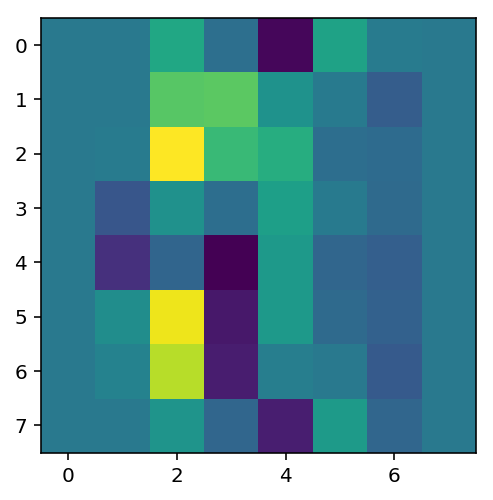

In [142]:
plt.imshow(xxx[:, 5].reshape(8, 8))

In [72]:
subspace_dict = {}
for class_name in np.unique(y):
    idx = np.argwhere(y == class_name).squeeze()
    x_class_subset = x[idx, :]
    x_class_subset
    subspace_dict.update({class_name: })

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

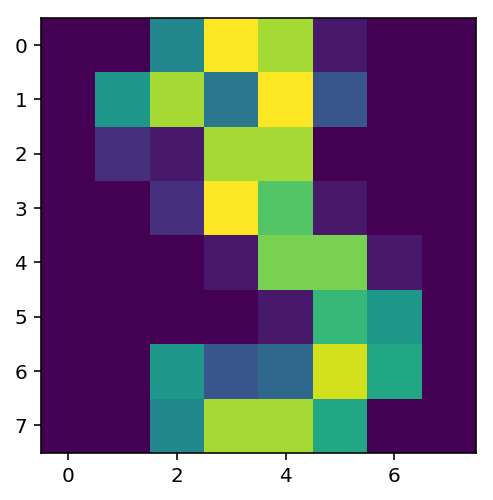

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from IPython.display import Image
plt.imshow(digits_data.images[3])

In [66]:
digits_data.images[0].shape

(8, 8)

In [207]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator

class SM(BaseEstimator):
    """Subspace Method (SM)
    Classification method using Subspace.

    Parameters
    ----------
    n_dimension : int
        Number of dimension of subspace.

    Attributes
    ----------
    subspaces_ : array, shape (n_classes, n_features, n_features)
        Subspace of N classes.
    """
    
    def __init__(self, n_dimension):
        self.n_dimension = n_dimension
    
    def fit(self, X, y):
        """Fit the model with X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data, where n_samples in the number of samples
            and n_features is the number of features.
        Returns
        -------
        self : object
            Returns the instance itself.
        """
        self.classes_ = np.unique(y)
        self.subspaces_ = []
        for class_name in self.classes_:
            idx = np.argwhere(y == class_name).squeeze()
            X_class_i = X[idx, :]

            pca = PCA(
                n_components=self.n_dimension, 
                random_state=self.random_state
                )
            pca.fit(X_class_i)

            # define projection matrix (equal to subspace)
            P = pca.components_.T @ pca.components_
            self.subspaces_.append(P)

        self.subspaces_ = np.array(self.subspaces_)
         
        return self

    def predict(self, X):
        """
        Perform classification on samples in X.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)

        Returns
        -------
        y_pred : array, shape (n_samples,)
            Class labels for samples in X.
        """

        # n: n_samples, d: n_features
        n, d = X.shape
        similarities = X.reshape((n, 1, 1, d)) @ \
            np.expand_dims(self.subspaces_, axis=0) @ \
            X.reshape((n, 1, d, 1))
        similarities = similarities.squeeze()
        return np.argmax(similarities, axis=1)

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

    def get_params(self, deep=True):
        return {'n_dimension': self.n_dimension}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter, value)
        return self

In [215]:
A = np.eye(3) * 3
A

array([[ 3.,  0.,  0.],
       [ 0.,  3.,  0.],
       [ 0.,  0.,  3.]])

In [216]:
df = pd.DataFrame({'animal': 'cat dog cat fish dog cat cat'.split(),
   ....:                    'size': list('SSMMMLL'),
   ....:                    'weight': [8, 10, 11, 1, 20, 12, 12],
   ....:                    'adult' : [False] * 5 + [True] * 2}); df

,adult,animal,size,weight
0,False,cat,S,8
1,False,dog,S,10
2,False,cat,M,11
3,False,fish,M,1
4,False,dog,M,20
5,True,cat,L,12
6,True,cat,L,12


In [235]:
import functools

S = pd.Series([i / 100.0 for i in range(1,11)])
def CumRet(x,y):
    return x * (1 + y)

def Red(x):
    return functools.reduce(CumRet,x,1.0)

S.expanding().sum()

0    0.01
1    0.03
2    0.06
3    0.10
4    0.15
5    0.21
6    0.28
7    0.36
8    0.45
9    0.55
dtype: float64

In [239]:
S.expanding().mean()

0    0.010
1    0.015
2    0.020
3    0.025
4    0.030
5    0.035
6    0.040
7    0.045
8    0.050
9    0.055
dtype: float64

In [225]:
def GrowUp(x):
   ....:    avg_weight =  sum(x[x['size'] == 'S'].weight * 1.5)
   ....:    avg_weight += sum(x[x['size'] == 'M'].weight * 1.25)
   ....:    avg_weight += sum(x[x['size'] == 'L'].weight)
   ....:    avg_weight /= len(x)
   ....:    return pd.Series(['L',avg_weight,True], index=['size', 'weight', 'adult'])

In [226]:
df.groupby('animal').apply(GrowUp)

,size,weight,adult
animal,,,
cat,L,12.4375,True
dog,L,20.0000,True
fish,L,1.2500,True


In [241]:
df = pd.DataFrame({'A' : [1, 1, 2, 2], 'B' : [1, -1, 1, 2]})
df

,A,B
0,1,1
1,1,-1
2,2,1
3,2,2


In [244]:
def replace(g):
   ....:    mask = g < 0
   ....:    g.loc[mask] = g[~mask].mean()
   ....:    return g

gb = df.groupby('A')

In [251]:
df = pd.DataFrame({'code': ['foo', 'bar', 'baz'] * 2,
   .....:                    'data': [0.16, -0.21, 0.33, 0.45, -0.59, 0.62],
   .....:                    'flag': [False, True] * 3})
   .....: 

In [257]:
df

,code,data,flag
0,foo,0.16,False
1,bar,-0.21,True
2,baz,0.33,False
3,foo,0.45,True
4,bar,-0.59,False
5,baz,0.62,True


In [261]:
df.loc[df.groupby('code')[['data']].transform(sum).sort_values(by='data').index]

,code,data,flag
1,bar,-0.21,True
4,bar,-0.59,False
0,foo,0.16,False
3,foo,0.45,True
2,baz,0.33,False
5,baz,0.62,True


In [264]:
rng = pd.date_range(start="2014-10-07",periods=10,freq='2min')
ts = pd.Series(data=list(range(10)), index=rng)
ts

2014-10-07 00:00:00    0
2014-10-07 00:02:00    1
2014-10-07 00:04:00    2
2014-10-07 00:06:00    3
2014-10-07 00:08:00    4
2014-10-07 00:10:00    5
2014-10-07 00:12:00    6
2014-10-07 00:14:00    7
2014-10-07 00:16:00    8
2014-10-07 00:18:00    9
Freq: 2T, dtype: int64

In [267]:
def cast(x):
    if len(x) > 2:
        return x[1] * 1.234
    return pd.NaT

mhc = {'Mean' : np.mean, 'Max': np.max, 'Custom': cast}

ts.resample('5min').apply(mhc)

Custom  2014-10-07 00:00:00    1.234
        2014-10-07 00:05:00      NaT
        2014-10-07 00:10:00    7.404
        2014-10-07 00:15:00      NaT
Max     2014-10-07 00:00:00        2
        2014-10-07 00:05:00        4
        2014-10-07 00:10:00        7
        2014-10-07 00:15:00        9
Mean    2014-10-07 00:00:00        1
        2014-10-07 00:05:00      3.5
        2014-10-07 00:10:00        6
        2014-10-07 00:15:00      8.5
dtype: object

In [269]:
 df = pd.DataFrame({'host':['other','other','that','this','this'],
   .....:                    'service':['mail','web','mail','mail','web'],
   .....:                    'no':[1, 2, 1, 2, 1]}).set_index(['host', 'service'])

In [270]:
df

no
host  service    
other mail      1
      web       2
that  mail      1
this  mail      2
      web       1

In [276]:
mask = df.groupby(level=0).agg('idxmax')
mask

,no
host,
other,"(other, web)"
that,"(that, mail)"
this,"(this, mail)"


In [277]:
df_count = df.loc[mask['no']].reset_index()

In [278]:
df_count

,host,service,no
0,other,web,2
1,that,mail,1
2,this,mail,2


In [279]:
 df = pd.DataFrame([0, 1, 0, 1, 1, 1, 0, 1, 1], columns=['A'])


In [280]:
df

,A
0,0
1,1
2,0
3,1
4,1
5,1
6,0
7,1
8,1


In [281]:
df.A.groupby((df.A != df.A.shift()).cumsum()).groups

{1: Int64Index([0], dtype='int64'),
 2: Int64Index([1], dtype='int64'),
 3: Int64Index([2], dtype='int64'),
 4: Int64Index([3, 4, 5], dtype='int64'),
 5: Int64Index([6], dtype='int64'),
 6: Int64Index([7, 8], dtype='int64')}

In [282]:
df = pd.DataFrame(data={'Province' : ['ON','QC','BC','AL','AL','MN','ON'],
   .....:                          'City' : ['Toronto','Montreal','Vancouver','Calgary','Edmonton','Winnipeg','Windsor'],
   .....:                          'Sales' : [13,6,16,8,4,3,1]})
   .....: 

In [283]:
df

,City,Province,Sales
0,Toronto,ON,13
1,Montreal,QC,6
2,Vancouver,BC,16
3,Calgary,AL,8
4,Edmonton,AL,4
5,Winnipeg,MN,3
6,Windsor,ON,1


In [287]:
table = pd.pivot_table(df,values=['Sales'],index=['Province'],columns=['City'],aggfunc=np.sum,margins=True)
table

Sales                                                           
City     Calgary Edmonton Montreal Toronto Vancouver Windsor Winnipeg   All
Province                                                                   
AL           8.0      4.0      NaN     NaN       NaN     NaN      NaN  12.0
BC           NaN      NaN      NaN     NaN      16.0     NaN      NaN  16.0
MN           NaN      NaN      NaN     NaN       NaN     NaN      3.0   3.0
ON           NaN      NaN      NaN    13.0       NaN     1.0      NaN  14.0
QC           NaN      NaN      6.0     NaN       NaN     NaN      NaN   6.0
All          8.0      4.0      6.0    13.0      16.0     1.0      3.0  51.0

In [288]:
table.stack('City')

Sales
Province City            
AL       All         12.0
         Calgary      8.0
         Edmonton     4.0
BC       All         16.0
         Vancouver   16.0
MN       All          3.0
         Winnipeg     3.0
ON       All         14.0
         Toronto     13.0
         Windsor      1.0
QC       All          6.0
         Montreal     6.0
All      All         51.0
         Calgary      8.0
         Edmonton     4.0
         Montreal     6.0
         Toronto     13.0
         Vancouver   16.0
         Windsor      1.0
         Winnipeg     3.0

In [290]:
grades = [48,99,75,80,42,80,72,68,36,78]
df = pd.DataFrame( {'ID': ["x%d" % r for r in range(10)],
  'Gender' : ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'M'],
                'ExamYear': ['2007','2007','2007','2008','2008','2008','2008','2009','2009','2009'],
                 'Class': ['algebra', 'stats', 'bio', 'algebra', 'algebra', 'stats', 'stats', 'algebra', 'bio', 'bio'],
        'Participated': ['yes','yes','yes','yes','no','yes','yes','yes','yes','yes'],
                       'Passed': ['yes' if x > 50 else 'no' for x in grades],
                      'Employed': [True,True,True,False,False,False,False,True,True,False],
                       'Grade': grades})

df

,Class,Employed,ExamYear,Gender,Grade,ID,Participated,Passed
0,algebra,True,2007,F,48,x0,yes,no
1,stats,True,2007,M,99,x1,yes,yes
2,bio,True,2007,F,75,x2,yes,yes
3,algebra,False,2008,M,80,x3,yes,yes
4,algebra,False,2008,F,42,x4,no,no
5,stats,False,2008,M,80,x5,yes,yes
6,stats,False,2008,F,72,x6,yes,yes
7,algebra,True,2009,M,68,x7,yes,yes
8,bio,True,2009,M,36,x8,yes,no
9,bio,False,2009,M,78,x9,yes,yes


In [293]:
df.groupby('ExamYear').aggregate({'Participated': lambda x: x.value_counts()['yes'],
   .....:                     'Passed': lambda x: sum(x == 'yes'),
   .....:                     'Employed' : lambda x : sum(x),
   .....:                     'Grade' : lambda x : sum(x) / len(x)})

,Participated,Passed,Employed,Grade
ExamYear,,,,
2007,3,2,3,74.000000
2008,3,3,0,68.500000
2009,3,2,2,60.666667


In [307]:
df1 = df.groupby('ExamYear').apply(lambda x: x['Passed'].value_counts()['yes'] / x['Participated'].value_counts().yes)

In [308]:
df1

ExamYear
2007    0.666667
2008    1.000000
2009    0.666667
dtype: float64

In [311]:
df = pd.DataFrame({'value': np.random.randn(36)},
   .....:                   index=pd.date_range('2011-01-01', freq='M', periods=36))
df.head(3)

,value
2011-01-31,0.740112
2011-02-28,0.759123
2011-03-31,1.850777


In [315]:
pd.pivot_table(df, index=df.index.month, columns=df.index.year,
   .....:                values='value', aggfunc='sum')

,2011,2012,2013
1,0.740112,1.209099,0.743993
2,0.759123,-0.347221,0.737913
3,1.850777,0.053392,0.119899
4,-0.987429,1.676592,-0.717481
5,0.533338,-0.631359,1.173148
6,-2.322030,1.166135,0.606597
7,0.478984,0.285295,-0.349127
8,-0.269734,-0.135787,0.963026
9,0.867195,0.292550,-0.651666
10,0.295983,-2.089024,0.965108


In [317]:
df = pd.DataFrame(data={'A' : [[2,4,8,16],[100,200],[10,20,30]], 'B' : [['a','b','c'],['jj','kk'],['ccc']]},index=['I','II','III'])
df

,A,B
I,"[2, 4, 8, 16]","[a, b, c]"
II,"[100, 200]","[jj, kk]"
III,"[10, 20, 30]",[ccc]


In [332]:
def SeriesFromSubList(aList):
   .....:    return pd.Series(aList)

pd.concat(dict([ (ind,row.apply(SeriesFromSubList)) for ind,row in df.iterrows() ]))


0    1    2     3
I   A    2    4    8  16.0
    B    a    b    c   NaN
II  A  100  200  NaN   NaN
    B   jj   kk  NaN   NaN
III A   10   20   30   NaN
    B  ccc  NaN  NaN   NaN

In [334]:
df = pd.DataFrame(data=np.random.randn(2000,2)/10000,
   .....:                   index=pd.date_range('2001-01-01',periods=2000),
   .....:                   columns=['A','B']);
df

,A,B
2001-01-01,2.814119e-05,0.000054
2001-01-02,-1.204784e-04,-0.000036
2001-01-03,8.852905e-05,-0.000010
2001-01-04,-1.995254e-05,0.000106
2001-01-05,4.763179e-05,0.000033
2001-01-06,1.524428e-06,0.000019
2001-01-07,-4.586318e-05,0.000037
2001-01-08,3.499521e-05,-0.000209
2001-01-09,-1.356989e-05,0.000046
2001-01-10,-1.163088e-04,-0.000056


In [335]:
def gm(aDF,Const):
   .....:    v = ((((aDF.A+aDF.B)+1).cumprod())-1)*Const
   .....:    return (aDF.index[0],v.iloc[-1])
   .....: 

In [336]:
S = pd.Series(dict([ gm(df.iloc[i:min(i+51,len(df)-1)],5) for i in range(len(df)-50) ])); S

2001-01-01    0.009457
2001-01-02    0.007821
2001-01-03    0.008388
2001-01-04    0.008228
2001-01-05    0.007343
2001-01-06    0.007597
2001-01-07    0.007683
2001-01-08    0.008298
2001-01-09    0.007681
2001-01-10    0.008723
2001-01-11    0.009115
2001-01-12    0.008716
2001-01-13    0.006856
2001-01-14    0.007519
2001-01-15    0.007233
2001-01-16    0.007893
2001-01-17    0.010149
2001-01-18    0.010109
2001-01-19    0.008973
2001-01-20    0.008756
2001-01-21    0.009590
2001-01-22    0.010269
2001-01-23    0.010676
2001-01-24    0.009372
2001-01-25    0.008686
2001-01-26    0.009348
2001-01-27    0.009660
2001-01-28    0.009921
2001-01-29    0.009499
2001-01-30    0.009045
                ...   
2006-04-05    0.002123
2006-04-06    0.003812
2006-04-07    0.003733
2006-04-08    0.002199
2006-04-09    0.000383
2006-04-10   -0.000503
2006-04-11   -0.001618
2006-04-12   -0.003033
2006-04-13   -0.003531
2006-04-14   -0.003281
2006-04-15   -0.003434
2006-04-16   -0.003327
2006-04-17 

In [344]:
rng = pd.date_range('2000-01-01', periods=6)
df1 = pd.DataFrame(np.random.randn(6, 3), index=rng, columns=['A', 'B', 'C'])
df2 = df1.copy()

df = pd.concat([df1, df2],ignore_index=False, axis=1); df

,A,B,C,A,B,C
2000-01-01,1.520009,-0.021158,1.065471,1.520009,-0.021158,1.065471
2000-01-02,0.936634,-1.168356,0.853148,0.936634,-1.168356,0.853148
2000-01-03,-0.986362,-0.023824,0.086576,-0.986362,-0.023824,0.086576
2000-01-04,-1.483119,0.278596,-0.214773,-1.483119,0.278596,-0.214773
2000-01-05,-0.764376,0.445373,-1.093055,-0.764376,0.445373,-1.093055
2000-01-06,0.277030,-0.229107,-0.906773,0.277030,-0.229107,-0.906773


In [345]:
df = pd.DataFrame(data={'Area' : ['A'] * 5 + ['C'] * 2,
   .....:                         'Bins' : [110] * 2 + [160] * 3 + [40] * 2,
   .....:                         'Test_0' : [0, 1, 0, 1, 2, 0, 1],
   .....:                         'Data' : np.random.randn(7)});df


,Area,Bins,Data,Test_0
0,A,110,-0.784191,0
1,A,110,1.293617,1
2,A,160,-1.184408,0
3,A,160,0.119154,1
4,A,160,-0.706980,2
5,C,40,-1.148123,0
6,C,40,-0.157037,1


In [347]:
df['Test_1'] = df['Test_0'] -1
df

,Area,Bins,Data,Test_0,Test_1
0,A,110,-0.784191,0,-1
1,A,110,1.293617,1,0
2,A,160,-1.184408,0,-1
3,A,160,0.119154,1,0
4,A,160,-0.706980,2,1
5,C,40,-1.148123,0,-1
6,C,40,-0.157037,1,0


In [346]:

pd.merge(df, df, left_on=['Bins', 'Area', 'Test_0'], right_on=['Bins', 'Area', 'Test_1'], suffixes=('_L', '_R'))

,Area,Bins,Data_L,Test_0_L,Test_1_L,Data_R,Test_0_R,Test_1_R
0,A,110,-0.784191,0,-1,1.293617,1,0
1,A,160,-1.184408,0,-1,0.119154,1,0
2,A,160,0.119154,1,0,-0.706980,2,1
3,C,40,-1.148123,0,-1,-0.157037,1,0


In [349]:
df = pd.DataFrame(
   .....:      {u'stratifying_var': np.random.uniform(0, 100, 20),
   .....:       u'price': np.random.normal(100, 5, 20)})

,price,stratifying_var
0,103.177089,84.857841
1,101.453233,17.485150
2,99.593667,17.975556
3,101.817830,73.166463
4,96.567300,78.426384


In [351]:
df[u'quartiles'] = pd.qcut(
   .....:     df[u'stratifying_var'],
   .....:     4,
   .....:     labels=[u'0-25%', u'25-50%', u'50-75%', u'75-100%'])
df.head(10)

,price,stratifying_var,quartiles
0,103.177089,84.857841,75-100%
1,101.453233,17.485150,0-25%
2,99.593667,17.975556,0-25%
3,101.817830,73.166463,50-75%
4,96.567300,78.426384,50-75%
5,99.165369,56.925059,50-75%
6,98.269966,8.954624,0-25%
7,100.147348,33.097965,25-50%
8,99.610548,30.132631,25-50%
9,105.837642,60.969847,50-75%


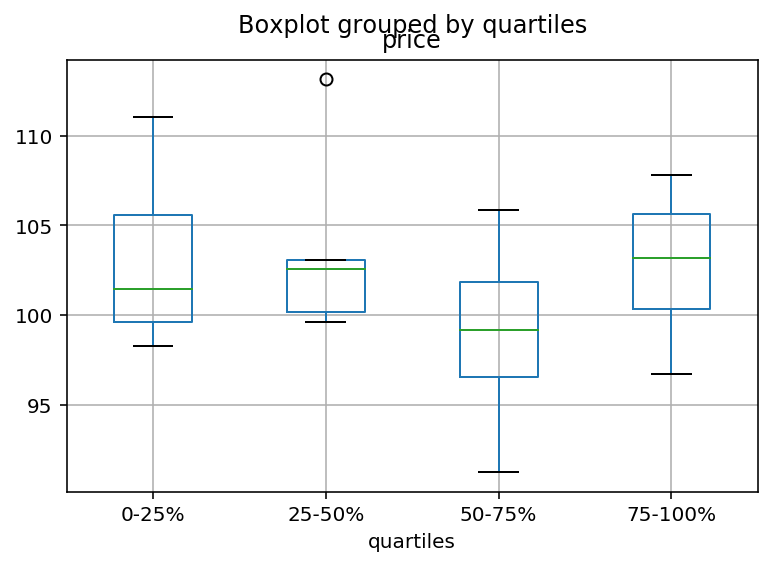

In [352]:
df.boxplot(column='price', by='quartiles')

In [353]:
%%bash
ls

Embed.ipynb
Untitled.ipynb
Visualize.ipynb
dow_embedding.png
example.ipynb
input
month_embedding.png
submit
train.ipynb


In [355]:
import glob

g = glob.glob('*.ipynb')
g

['Embed.ipynb',
 'example.ipynb',
 'train.ipynb',
 'Untitled.ipynb',
 'Visualize.ipynb']

In [369]:
import itertools

a = {'height': [60, 70],
     'weight': [100, 140, 180],
      'sex': ['Male', 'Female']}
n = itertools.product(*a.values)

TypeError: type object argument after * must be an iterable, not builtin_function_or_method

In [367]:
for i in n:
    print(i)

In [381]:
*(a.values())

SyntaxError: can't use starred expression here (<ipython-input-381-9d11f62b3908>, line 1)

In [75]:
tenhou_df = pd.read_csv('Workbook1.csv', header=None).iloc[:-1]
tenhou_df

,0
0,2位 | L0000 | 12 | 2014-12-28 | 21:41 | 四般東喰赤－－...
1,2位 | L0000 | 16 | 2014-12-28 | 21:54 | 四般東喰赤－－...
2,3位 | L0000 | 06 | 2014-12-28 | 22:10 | 四般東喰赤－－...
3,2位 | L0000 | 20 | 2014-12-28 | 22:17 | 四般東喰赤－－...
4,3位 | L0000 | 15 | 2014-12-28 | 22:38 | 四般東喰赤－－...
5,3位 | L0000 | 11 | 2014-12-28 | 22:54 | 四般東喰赤－－...
6,1位 | L0000 | 07 | 2014-12-28 | 23:05 | 四般東喰赤－－...
7,1位 | L0000 | 08 | 2014-12-28 | 23:13 | 四般東喰赤－－...
8,1位 | L0000 | 09 | 2014-12-28 | 23:22 | 四般東喰赤－－...
9,1位 | L0000 | 18 | 2014-12-28 | 23:32 | 四般東喰赤－－...


In [ ]:
split_df = tenhou_df.applymap(lambda x: x.split('|'))

def level2cat(level):
    if level== u'般' or level == u'上':
        return 0
    if level == u'特':
        return 1
    if level == u'鳳':
        return 2

ranks = []
datetimes = []
levels = []

for i, v in split_df.iterrows():
    ranks.append(v.loc[0][0][0])
    datetimes.append(pd.to_datetime(v.loc[0][3] + v.loc[0][4]))
    levels.append(level2cat(v.loc[0][5][2]))
    

In [165]:
my_stats_df = pd.DataFrame({'rank': ranks, 'level': levels}, index=datetimes)
my_stats_df['last_rank'] = my_stats_df['rank'].shift(1)
my_stats_df = my_stats_df.iloc[1:]
my_stats_df

,level,rank,last_rank
2014-12-28 21:54:00,0,2,2
2014-12-28 22:10:00,0,3,2
2014-12-28 22:17:00,0,2,3
2014-12-28 22:38:00,0,3,2
2014-12-28 22:54:00,0,3,3
2014-12-28 23:05:00,0,1,3
2014-12-28 23:13:00,0,1,1
2014-12-28 23:22:00,0,1,1
2014-12-28 23:32:00,0,1,1
2014-12-28 23:52:00,0,1,1


In [84]:
rank_df = pd.DataFrame({'rank': rank_df.values.flatten(), 'last_rank': rank_df.shift(1).values.flatten()})

In [85]:
rank_df = rank_df.drop(0)

In [86]:
rank_df = rank_df.astype('int')

In [87]:
rank_df.groupby('last_rank')['rank'].mean()

last_rank
1    2.422425
2    2.396433
3    2.401709
4    2.408638
Name: rank, dtype: float64

In [88]:
rank_df.groupby('last_rank')['rank'].value_counts()

last_rank  rank
1          1       209
           2       198
           3       187
           4       173
2          1       196
           2       195
           3       191
           4       147
3          1       201
           3       183
           2       168
           4       150
4          2       167
           1       161
           3       141
           4       133
Name: rank, dtype: int64

In [ ]:
for i, v in rank_df